In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

my_cmap = "viridis"

In [2]:
poa = gpd.read_file("Shape\poa_selected.gpkg")
synthetic = pd.read_csv("Data\population.csv")

In [3]:
poa_list = synthetic.groupby("POA_CODE21").first().reset_index()["POA_CODE21"]

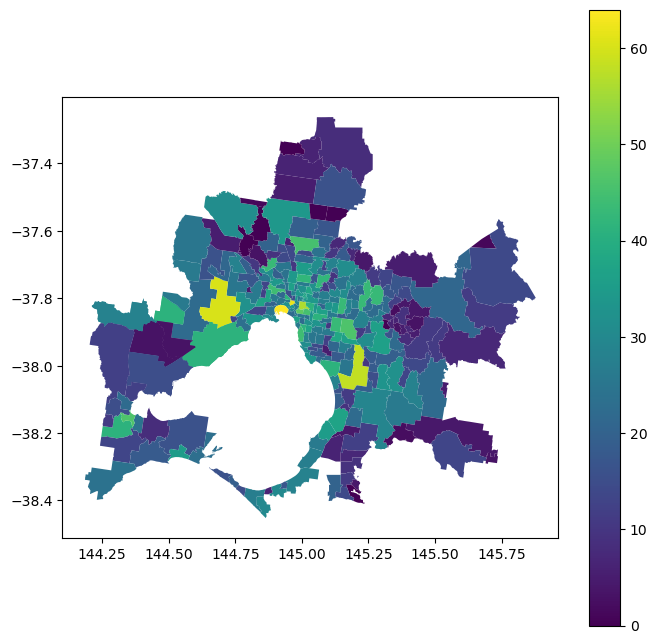

In [4]:
rego = pd.read_csv("Data\Whole_Fleet_Vehicle_Registration_Snapshot_by_Postcode_Q2_2023.csv")
evs = rego[rego["CD_CL_FUEL_ENG"]=="E "] # Get only Eletric 
evs[evs["POSTCODE"].astype(str).isin(poa_list.astype(str))] # Get Vic Postcodes 
evs = evs[evs["NB_YEAR_MFC_VEH"].astype(int) > 2018] # Remove E older than 2018 (last 5 years)
evs = evs[evs["TOTAL1"] <= 2]
evs = evs.reset_index(drop=True)
evs = evs[["POSTCODE", "TOTAL1"]]
evs = evs.groupby("POSTCODE").sum().reset_index()
evs["POSTCODE"] = evs["POSTCODE"].astype(str)
evs_merged = poa.merge(evs, left_on="POA_CODE21", right_on="POSTCODE", how="left").drop(columns="POSTCODE")
evs_merged["TOTAL1"].fillna(0, inplace=True)
ev_totals = evs_merged[["POA_CODE21","TOTAL1"]]

# Plotting 
fig, axes = plt.subplots(1,1, figsize=(8, 8))
poa_ev = poa.merge(ev_totals, on="POA_CODE21", how="inner")
poa_ev.plot(ax=axes, column="TOTAL1", cmap=my_cmap, legend=True)
plt.show()

In [5]:
ev_totals = ev_totals[ev_totals['POA_CODE21'].isin(poa_list.astype(str))]
ev_totals = ev_totals.drop_duplicates(subset='POA_CODE21')
print(ev_totals["TOTAL1"].sum())

6128.0


In [6]:
area_code = pd.read_csv("Data\\area_codes.csv")
area_code["POA_CODE21"] = area_code["POA_CODE21"].astype(str)

In [49]:
ev_totals.to_csv("Data\poa_ev.csv", index=False)